In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings  
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/HMFMMUEX.ttc").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [2]:
data = pd.read_excel("강서구_power bi.xlsx")

data

,행정동,1인가구,전체20~34,전체35~65,전체65세이상,남성20~34,남성35~65,남성65세이상,여성20~34,여성35~65,...,투룸.쓰리룸(보증금),투룸.쓰리룸(월세),오피스텔/도시형생활주택(보증금),오피스텔/도시형생활주택(월세),아파트(보증금),아파트(월세),원룸(전세),투룸.쓰리룸(전세),오피스텔/도시형생활주택(전세),아파트(전세)
0,염창동,2987,1504,1103,380,608,544,83,896,559,...,3000,72,4000,70,29800,115,11000,28700,28200,66545
1,등촌1동,5988,3498,1910,580,1304,997,155,2194,913,...,1000,103,2000,108,32772,82,11800,20470,26800,48848
2,등촌2동,2144,845,937,362,405,465,88,440,472,...,1000,103,2000,108,32772,82,11800,20470,26800,48848
3,등촌3동,5323,778,2396,2149,394,1194,694,384,1202,...,1000,103,2000,108,32772,82,11800,20470,26800,48848
4,화곡1동,10208,4544,4338,1326,2170,2387,400,2374,1951,...,5000,48,5000,48,32300,90,12600,19300,19100,48194
5,화곡2동,2316,636,1191,489,361,633,150,275,558,...,5000,48,5000,48,32300,90,12600,19300,19100,48194
6,화곡3동,2271,731,1039,501,326,566,140,405,473,...,5000,48,5000,48,32300,90,12600,19300,19100,48194
7,화곡4동,2964,753,1587,624,377,815,181,376,772,...,5000,48,5000,48,32300,90,12600,19300,19100,48194
8,화곡본동,5623,2380,2504,739,1155,1357,208,1225,1147,...,5000,48,5000,48,32300,90,12600,19300,19100,48194
9,화곡6동,4159,1851,1727,581,777,970,175,1074,757,...,5000,48,5000,48,32300,90,12600,19300,19100,48194


In [15]:
data.corr()[0:4]

,1인가구,전체20~34,전체35~65,전체65세이상,남성20~34,남성35~65,남성65세이상,여성20~34,여성35~65,여성65이상,...,투룸.쓰리룸(보증금),투룸.쓰리룸(월세),오피스텔/도시형생활주택(보증금),오피스텔/도시형생활주택(월세),아파트(보증금),아파트(월세),원룸(전세),투룸.쓰리룸(전세),오피스텔/도시형생활주택(전세),아파트(전세)
1인가구,1.000000,0.928154,0.953761,0.190869,0.947002,0.944107,0.206158,0.897559,0.935470,0.180787,...,0.194449,0.252246,0.093357,0.213112,0.206962,0.172028,0.296825,0.119509,0.084453,0.204414
전체20~34,0.928154,1.000000,0.795329,-0.165951,0.978205,0.799675,-0.145262,0.992243,0.763587,-0.174634,...,0.212218,0.225541,0.102975,0.203541,0.265855,0.252508,0.319043,0.124229,0.144885,0.281307
전체35~65,0.953761,0.795329,1.000000,0.344394,0.866054,0.989493,0.355761,0.736439,0.981334,0.334531,...,0.209210,0.120070,0.163975,0.116272,0.121701,0.105748,0.229224,0.090067,-0.004354,0.121427
전체65세이상,0.190869,-0.165951,0.344394,1.000000,-0.116438,0.295757,0.984931,-0.192141,0.397845,0.996049,...,-0.125144,0.307190,-0.183921,0.183483,-0.090722,-0.200739,-0.002882,0.018672,-0.069858,-0.161211


<AxesSubplot:>

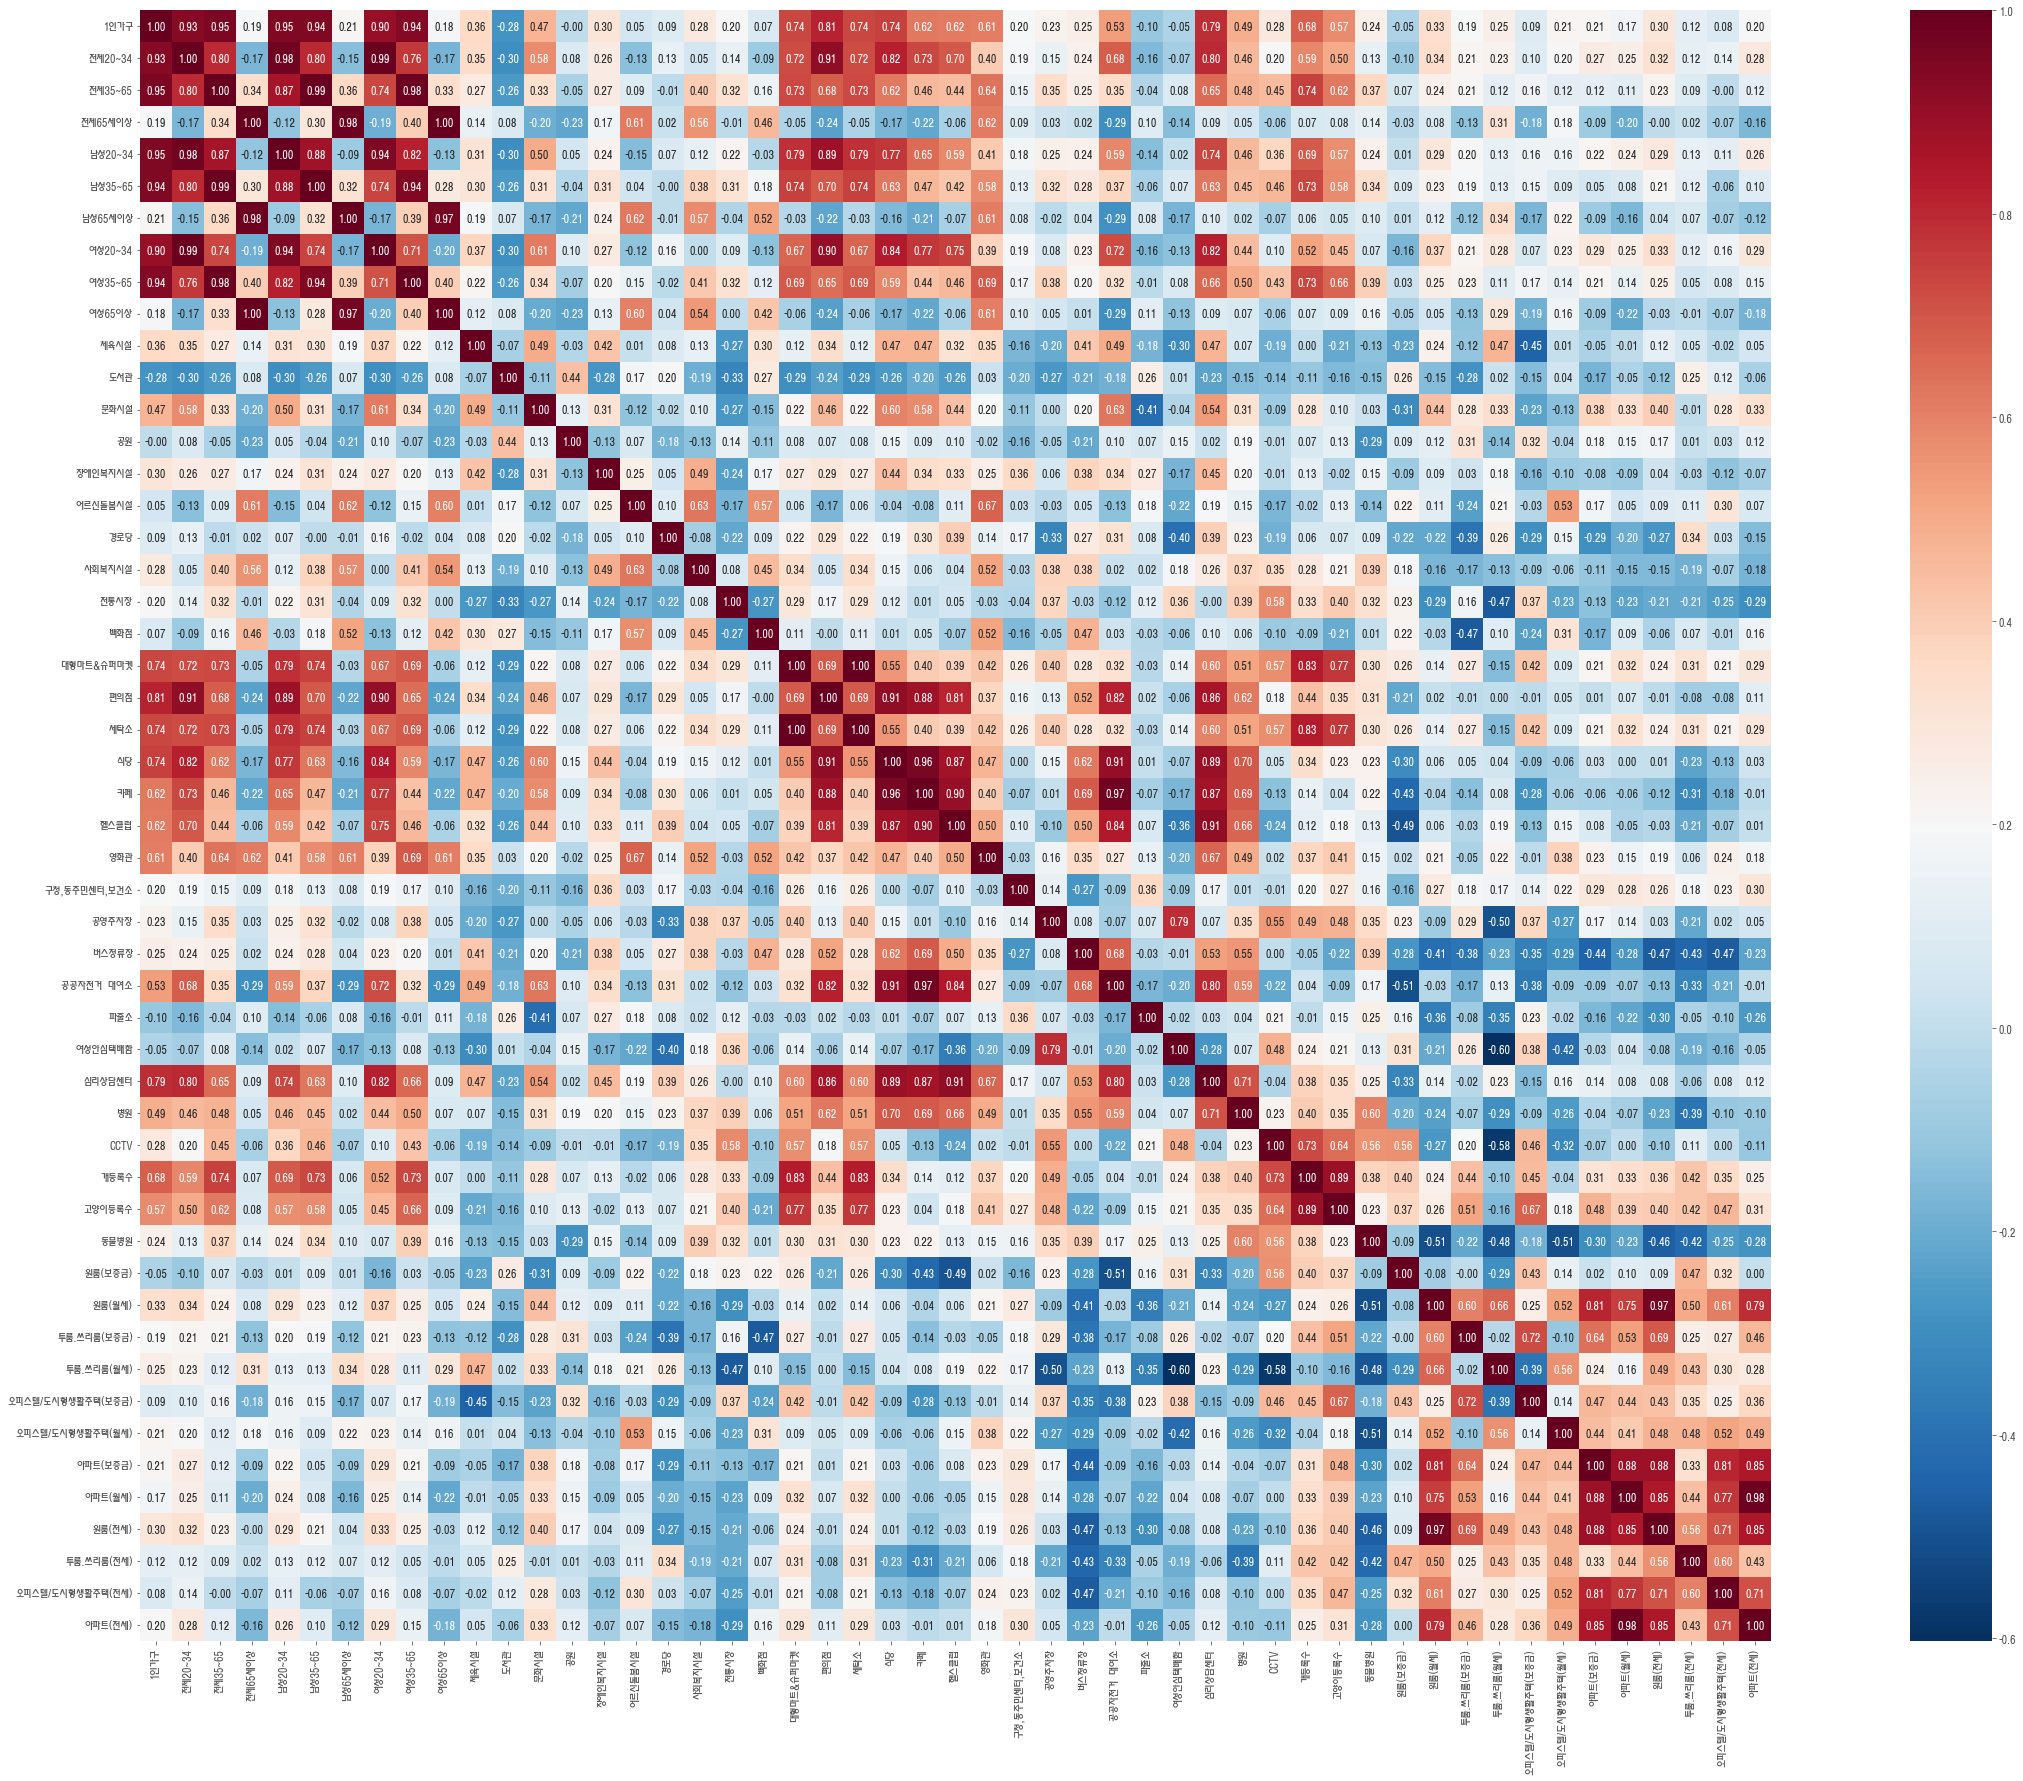

In [3]:
# 히트맵도 한번 그려보자
fig=plt.gcf()
fig.set_size_inches(50,30)
sns.heatmap(data.corr(), cmap='RdBu_r', square=True, cbar=True, annot=True, fmt=".2f")

In [12]:
feature_singleholds = data.corr()[0:1].T


In [13]:
# 저장하기
feature_singleholds.to_excel("weight_all.xlsx", encoding='utf-8-sig')     

In [11]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [6]:
okt = Okt()
kkma = Kkma()

In [27]:
print("okt:",okt.morphs("무실리콘"))
print(kkma.morphs("무실리콘"))

okt: ['무', '실리콘']
['무', '실리콘']
